In [28]:
import sys
sys.path.append('/home/tpopova/prj/PB_SCF/charge_surface/py_files')
from flatQuenchedBrush import flatQuenchedBrush
from create_in import create_in
import matplotlib.pyplot as plt
import numpy as np

Параметры

In [29]:
N = 300
# S = 150

S_namics = 150

alpha = 0.5

# Cs_range = [0.0005, 0.003, 0.007, 0.01]
Cs_range = [0.0005, 0.003, 0.007, 0.01]
surf_val_values = 0.75
S = (alpha * N * S_namics) / (alpha * N - surf_val_values * S_namics)
chi = 0.5
chi_surf = -0.3

<>:58: SyntaxWarning: invalid escape sequence '\c'
<>:58: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_2155267/3528653708.py:58: SyntaxWarning: invalid escape sequence '\c'
  plt.legend(title = f"$N = {N}, S_{{AT}} = {round(S, 1)}, S_{{scf}} = {S_namics}, val = {surf_val_values}, \\alpha = {alpha}, \chi = {chi}$", fontsize=9)


Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 2.706887e+00 |g| = 8.218764e+00 alpha = 1.000000e+00 
hessian scaling: 0.695401
it =  1  E = 2.491832e+00 |g| = 7.661195e+00 alpha = 1.121673e-01 
it =  2  E = 4.192285e+00 |g| = 8.081718e+00 alpha = 3.926453e-02 
it =  3  E = 6.550286e+00 |g| = 8.082629e+00 alpha = 1.516569e-02 
it =  4  E = 7.169348e+00 |g| = 7.293829e+00 alpha = 1.075713e-02 
it =  5  E = 3.910011e+00 |g| = 7.177997e+00 alpha = 3.334179e-02 
it =  6  E = 3.974357e+00 |g| = 7.173085e+00 alpha = 3.040451e-02 
it =  7  E = 6.165223e+00 |g| = 6.374311e+00 alpha = 1.059982e-02 
it =  8  E = 2.529862e+00 |g| = 7.151839e+00 alpha = 6.749591e-02 
it =  9  E = 6.069213e+00 |g| = 7.487138e+00 alpha = 1.298242e-02 
it =  10  E = 7.733420e+00 |g| = 7.257114e+0

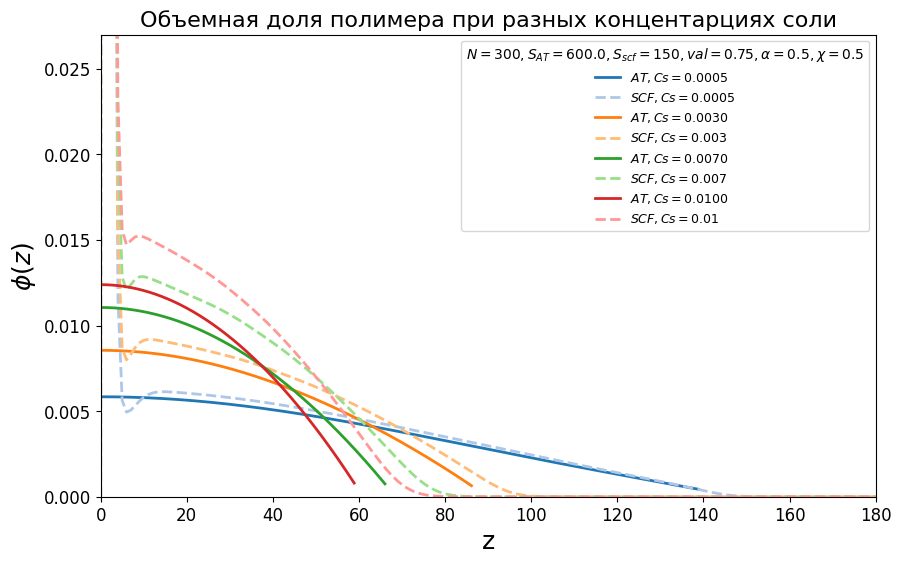

In [30]:
history = []

plt.figure(figsize=(10, 6))

# Цветовая палитра: пара цветов для каждой линии
colors = [
    ('#1f77b4', '#aec7e8'),  # Синий и светло-синий
    ('#ff7f0e', '#ffbb78'),  # Оранжевый и светло-оранжевый
    ('#2ca02c', '#98df8a'),  # Зелёный и светло-зелёный
    ('#d62728', '#ff9896'),  # Красный и светло-красный
    ('#9467bd', '#c5b0d5')   # Фиолетовый и светло-фиолетовый
]

for idx, cs in enumerate(Cs_range):
    
    # Создать SCF файл
    file_name_pro = create_in(
        template_surf_charge='/home/tpopova/prj/PB_SCF/charge_surface/scf_templates/flat_brush_surf.in',
        range_param='Cs',
        min_val=0.1,
        max_val=0.1,
        Cs=cs,
        chi=chi,
        chi_surf=chi_surf,
        N_layers=N,
        N=N,
        S=S_namics,
        alpha=alpha,
        surf_val=surf_val_values
    )
    
    # Получить результаты расчёта
    H_q, z_in_range_q, z_out_range_q, c_p, y_in, y_out, y_exp_in, y_exp_out, y_exp_q_in, y_exp_q_out, \
        f_ion_SCF_quen, Q_SCF_quen, parse_SCF_psi_quen, parse_SCF_phi_quen = flatQuenchedBrush(
            N=N,
            S=S,
            alpha=alpha,
            Cs=cs,
            file_names=file_name_pro
    )
    
    # Сохранить историю
    history.append(cs)
    
    # Выбрать цвета из палитры
    color_main, color_secondary = colors[idx % len(colors)]
    
    # Построить графики
    plt.plot(z_in_range_q, c_p, label=f'$AT, Cs={cs:.4f}$', color=color_main, linewidth=2)
    plt.plot(parse_SCF_phi_quen, '--', label=f'$SCF, Cs={cs}$', color=color_secondary, linewidth=2)

# Настройки графика
plt.ylim(0, 0.027)
plt.xlim(0, 180)
plt.xlabel('z', fontsize=18)
plt.ylabel(r'$\phi(z)$', fontsize=18)
plt.title('Объемная доля полимера при разных концентарциях соли', fontsize=16)
plt.legend(title = f"$N = {N}, S_{{AT}} = {round(S, 1)}, S_{{scf}} = {S_namics}, val = {surf_val_values}, \\alpha = {alpha}, \chi = {chi}$", fontsize=9)
plt.tick_params(axis='both', which='major', labelsize=12)  # Увеличение размера цифр на осях
plt.savefig('Fig_1.pdf', dpi=300, bbox_inches='tight')
plt.show()


# # Вывод истории значений
# for surf_val, S in history:
#     print(f'surf_val: {surf_val}, S: {S:.2f}')